In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dir_path = os.getcwd()

# Load the dataset
df = pd.read_csv("../../../Dataset/synthetic_diabetes_data_v6.csv")

# Display basic info and the first few rows of the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13230 entries, 0 to 13229
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient_ID     13230 non-null  int64  
 1   Timestamp      13230 non-null  object 
 2   Age            13230 non-null  int64  
 3   Gender         13230 non-null  object 
 4   BMI            13230 non-null  float64
 5   Blood_Glucose  13230 non-null  float64
 6   HbA1c          13230 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 723.6+ KB


,Patient_ID,Timestamp,Age,Gender,BMI,Blood_Glucose,HbA1c
0,1,2024-01-04 00:00:00,56,Male,22.47,63.93,3.9
1,1,2024-01-04 08:00:00,56,Male,22.47,59.30,3.9
2,1,2024-01-04 16:00:00,56,Male,22.47,94.25,3.9
3,1,2024-01-05 00:00:00,56,Male,22.47,81.92,3.9
4,1,2024-01-05 08:00:00,56,Male,22.47,77.48,3.9


In [3]:
# Basic statistical summary of the dataset
print(df.describe())

        Patient_ID           Age           BMI  Blood_Glucose         HbA1c
count  13230.00000  13230.000000  13230.000000   13230.000000  13230.000000
mean      25.00000     51.877551     29.370000     124.024313      5.893878
std       14.14267     18.871523      6.395378      34.394985      0.943630
min        1.00000     19.000000     18.620000      50.000000      3.800000
25%       13.00000     38.000000     24.330000      97.955000      5.600000
50%       25.00000     50.000000     29.740000     126.930000      6.200000
75%       37.00000     70.000000     35.080000     148.957500      6.600000
max       49.00000     81.000000     39.720000     200.000000      7.200000


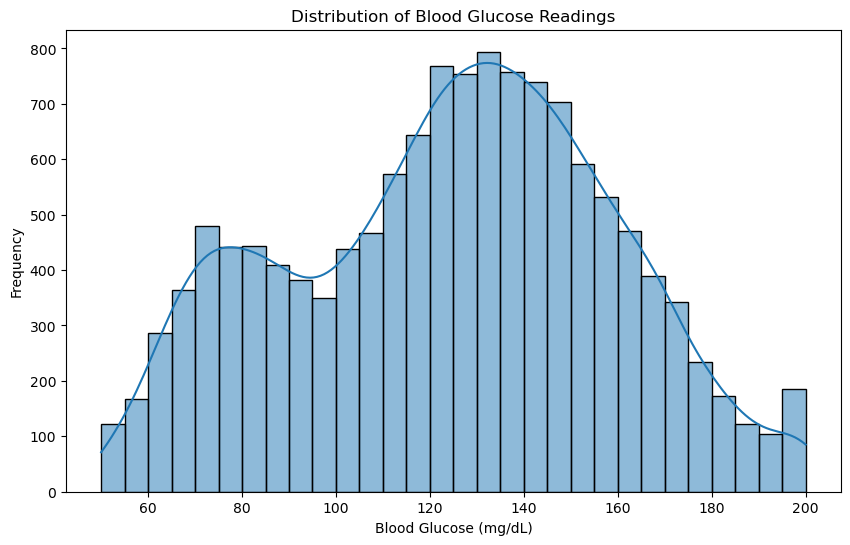

In [4]:
# Analyze Glucose Readings
## Distribution of glucose readings
plt.figure(figsize=(10, 6))
sns.histplot(df["Blood_Glucose"], kde=True, bins=30)
plt.title("Distribution of Blood Glucose Readings")
plt.xlabel("Blood Glucose (mg/dL)")
plt.ylabel("Frequency")
plt.show()

/Users/hassanshahzad/anaconda3/envs/Conda-FYP-App/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


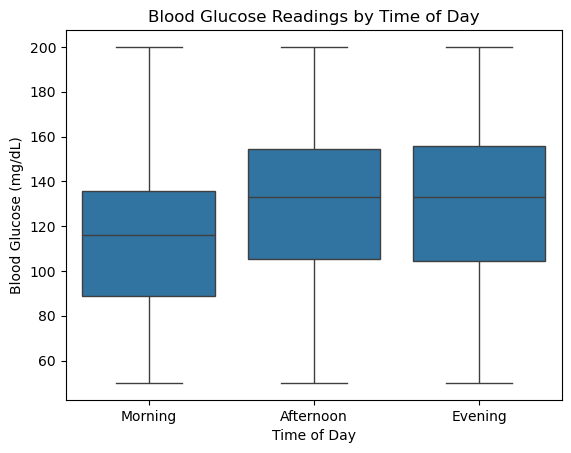

In [5]:
## Daily Variability in Glucose Readings
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Time_of_Day"] = df["Timestamp"].dt.hour
sns.boxplot(x="Time_of_Day", y="Blood_Glucose", data=df)
plt.title("Blood Glucose Readings by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Blood Glucose (mg/dL)")
plt.xticks(ticks=[0, 1, 2], labels=["Morning", "Afternoon", "Evening"])
plt.show()

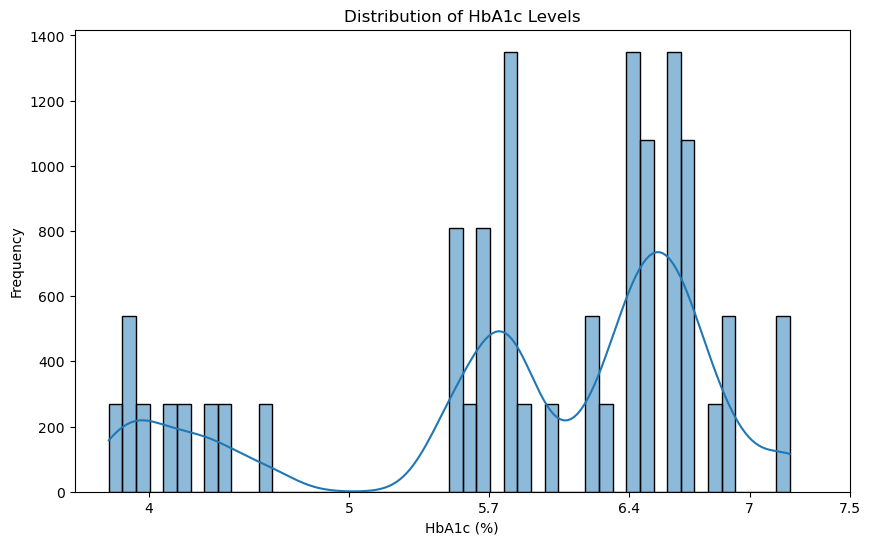

In [6]:
# Analyze HbA1c Levels
plt.figure(figsize=(10, 6))
sns.histplot(df["HbA1c"], kde=True, bins=50)
plt.title("Distribution of HbA1c Levels")
plt.xlabel("HbA1c (%)")
plt.ylabel("Frequency")
plt.xticks([4, 5, 5.7, 6.4, 7, 7.5], ["4", "5", "5.7", "6.4", "7", "7.5"])
plt.show()

In [7]:
# Define HbA1c thresholds for each category
bins = [0, 5.7, 6.4, np.inf]
labels = ["non_diabetic", "pre_diabetic", "diabetic"]

# Create a new column with the category for each patient
df["category"] = pd.cut(df["HbA1c"], bins=bins, labels=labels)

# Print a table with the counts for each category
category_counts = df["category"].value_counts()
category_counts

category
diabetic        4860
non_diabetic    4320
pre_diabetic    4050
Name: count, dtype: int64

In [8]:
# Group by patient and category, then count the number of readings in each category
category_counts_per_patient = df.groupby("Patient_ID")["category"].value_counts()

# Unstack the category level to get a DataFrame with one row per patient and one column per category
category_counts_per_patient = category_counts_per_patient.unstack(level="category")

# Fill NaN values with 0 (for patients who have no readings in a certain category)
category_counts_per_patient = category_counts_per_patient.fillna(0)

# Print the DataFrame
category_counts_per_patient

category,non_diabetic,pre_diabetic,diabetic
Patient_ID,,,
1,270,0,0
2,0,0,270
3,270,0,0
4,0,270,0
5,0,270,0
6,270,0,0
7,0,270,0
8,0,270,0
9,0,0,270


In [9]:
# Add a new column with the category that has the most readings for each patient
category_counts_per_patient["majority_category"] = category_counts_per_patient.idxmax(
    axis=1
)

# Count the number of patients in each category
patient_counts = category_counts_per_patient["majority_category"].value_counts()

# Print the counts
patient_counts

majority_category
diabetic        18
non_diabetic    16
pre_diabetic    15
Name: count, dtype: int64

In [10]:
# Print a table with the highest counts of HbA1c values
hba1c_counts = df["HbA1c"].value_counts()
hba1c_counts.head()

HbA1c
6.4    1350
6.6    1350
5.8    1350
6.7    1080
6.5    1080
Name: count, dtype: int64

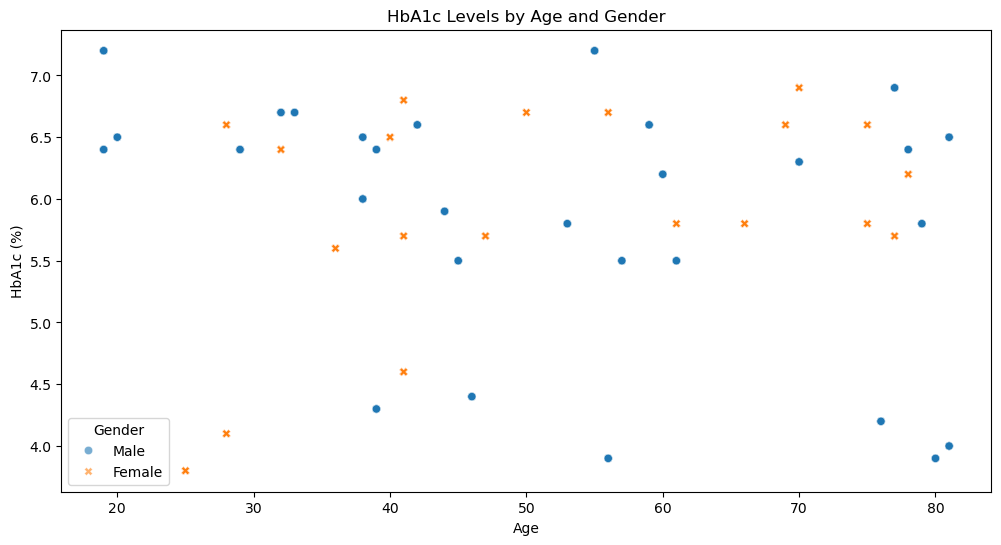

In [11]:
# Explore the relationship between BMI, Age, Gender, and HbA1c levels
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="HbA1c", hue="Gender", style="Gender", data=df, alpha=0.6)
plt.title("HbA1c Levels by Age and Gender")
plt.xlabel("Age")
plt.ylabel("HbA1c (%)")
plt.show()

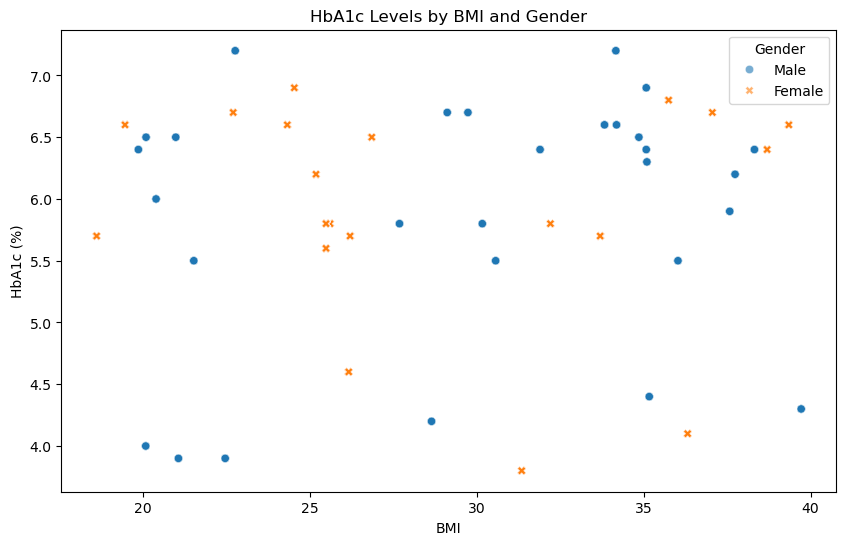

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="BMI", y="HbA1c", hue="Gender", style="Gender", data=df, alpha=0.6)
plt.title("HbA1c Levels by BMI and Gender")
plt.xlabel("BMI")
plt.ylabel("HbA1c (%)")
plt.show()

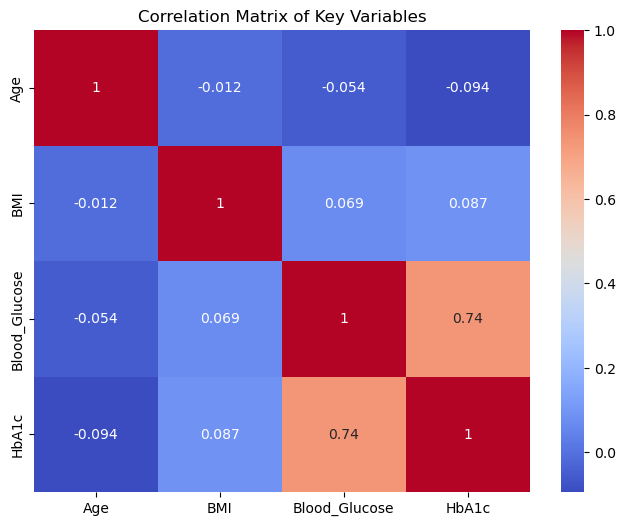

In [13]:
# Correlation matrix to explore potential relationships between variables
corr_matrix = df[["Age", "BMI", "Blood_Glucose", "HbA1c"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Key Variables")
plt.show()